In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
import tensorflow.keras.datasets.cifar10



In [2]:
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
x_train = x_train_orig/255.
x_test = x_test_orig/255.
y_train = y_train_orig
y_test = y_test_orig
print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 50000
number of test examples = 10000
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 1)


In [21]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)


In [22]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

In [5]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)


Epoch 1/10
1563/1563 [==============================] - 16s 4ms/step - loss: 1.5097 - accuracy: 0.4511 - val_loss: 1.2428 - val_accuracy: 0.5581
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1357 - accuracy: 0.5995 - val_loss: 1.0477 - val_accuracy: 0.6297
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9722 - accuracy: 0.6584 - val_loss: 0.9763 - val_accuracy: 0.6562
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8659 - accuracy: 0.6978 - val_loss: 0.9232 - val_accuracy: 0.6771
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7899 - accuracy: 0.7236 - val_loss: 0.9024 - val_accuracy: 0.6871
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7303 - accuracy: 0.7469 - val_loss: 0.9009 - val_accuracy: 0.6920
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6805 - accuracy: 0.7632 - val_loss: 0.9157 - val_accuracy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

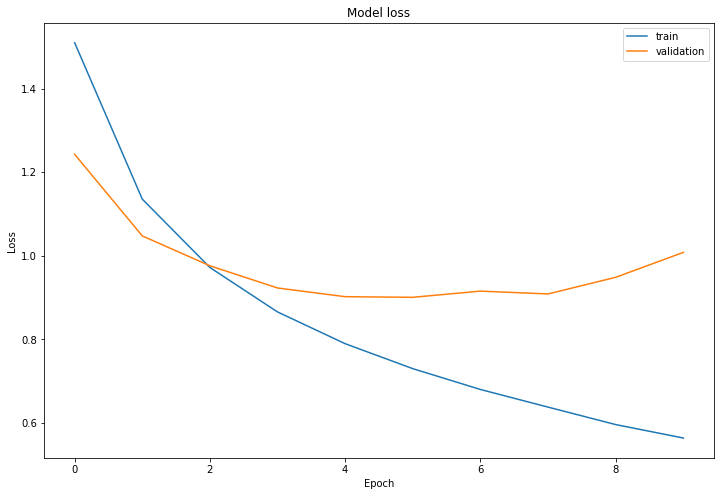

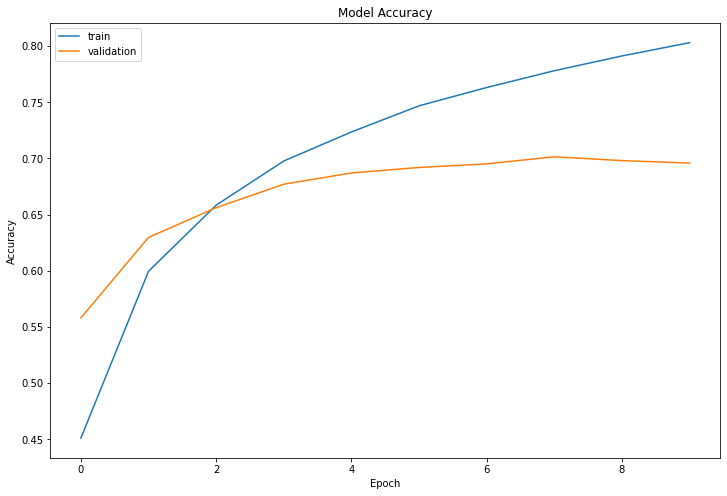

In [6]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [7]:

data_augmentation = models.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(32,
                                  32,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


In [23]:
new_model = models.Sequential([
  data_augmentation,

layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.Dropout(0.2),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10)
])

new_model.summary()

new_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 64)         

In [17]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)


In [18]:
history = new_model.fit(train_dataset, epochs=20, validation_data=test_dataset)


Epoch 1/20
1563/1563 [==============================] - 28s 17ms/step - loss: 1.6650 - accuracy: 0.3907 - val_loss: 1.5465 - val_accuracy: 0.4587
Epoch 2/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3757 - accuracy: 0.5057 - val_loss: 1.2955 - val_accuracy: 0.5474
Epoch 3/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.2682 - accuracy: 0.5488 - val_loss: 1.1627 - val_accuracy: 0.5909
Epoch 4/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.2059 - accuracy: 0.5723 - val_loss: 1.1282 - val_accuracy: 0.6044
Epoch 5/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1567 - accuracy: 0.5914 - val_loss: 1.0674 - val_accuracy: 0.6304
Epoch 6/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1214 - accuracy: 0.6068 - val_loss: 0.9942 - val_accuracy: 0.6513
Epoch 7/20
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0883 - accuracy: 0.6187 - val_loss: 1.0034 -

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

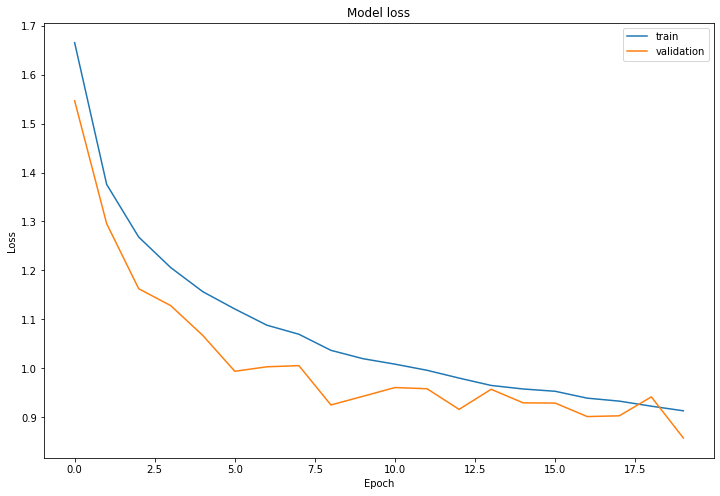

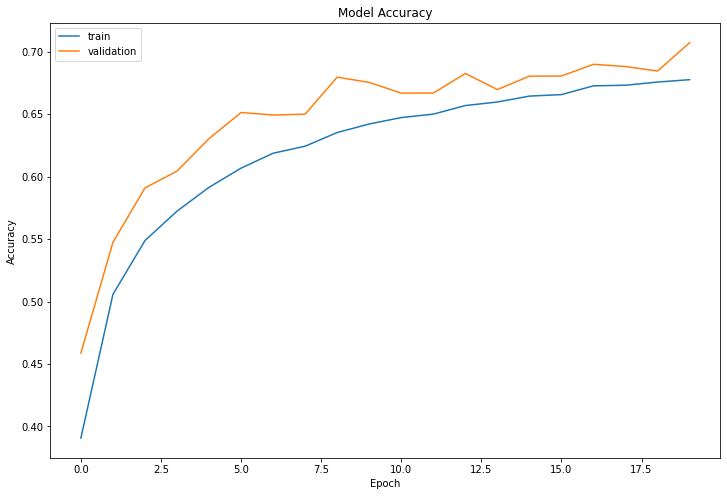

In [19]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [14]:


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization()),
model.add(layers.ReLU())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_orig, y_train_orig)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)


Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4464 - accuracy: 0.4795 - val_loss: 4.5365 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0567 - accuracy: 0.6312 - val_loss: 3.6216 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8877 - accuracy: 0.6909 - val_loss: 3.4577 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7792 - accuracy: 0.7297 - val_loss: 5.9728 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6995 - accuracy: 0.7569 - val_loss: 6.3619 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6391 - accuracy: 0.7752 - val_loss: 6.7954 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5813 - accuracy: 0.7973 - val_loss: 9.3789 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

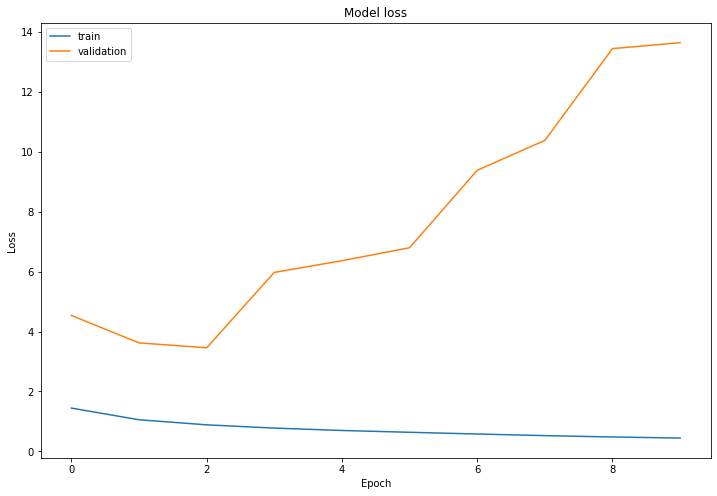

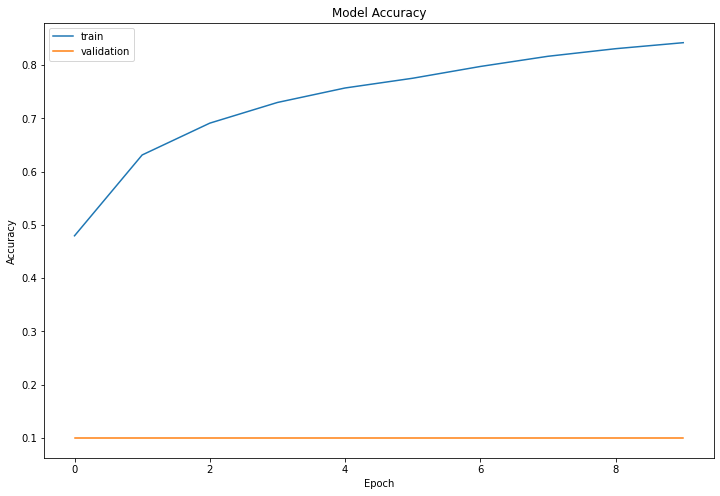

In [15]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow as tf


NameError: ignored